#글씨체 다운로드
##### 블록을 실행한 후에 런타임 재시작을 해줘야함

In [ ]:
!sudo apt-get install -y fonts-nanum #글씨체 
!sudo fc-cache -fv #글씨체
!rm ~/.cache/matplotlib -rf #글씨체

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 24 not upgraded.
Need to get 9,599 kB of archives.
After this operation, 29.6 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
Fetched 9,599 kB in 1s (8,102 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 122518 files and di

#구글 드라이브 연동

In [ ]:
from google.colab import drive 
drive.mount('/content/drive') 

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#데이터 불러오기, 전처리

In [ ]:
import pandas as pd #pandas 모듈
import numpy as np #numpy 모듈                 
import matplotlib.pyplot as plt #그래프 그리기 모듈
plt.rc('font', family='NanumBarunGothic') #matplotlib의 글씨체 - 한글 꺠짐 방지
plt.rcParams['axes.unicode_minus'] = False #matplotlib의 글씨체 - 한글 꺠짐 방지 
from matplotlib import font_manager, rc #글꼴 모듈


covid19_raw = pd.read_csv('/content/drive/MyDrive/python_code/code1/코로나바이러스감염증-19_확진환자_발생현황.csv', encoding = 'cp949') #한글로 된 csv파일을 불러올떄 cp949
#/content/drive/MyDrive/python_code/code1/코로나바이러스감염증-19_확진환자_발생현황_220929.csv : 구글 드라이브에서의 csv파일 경로

In [ ]:
covid19_raw

,일자,계(명),국내발생(명),해외유입(명),사망(명)
0,2020-01-20,1,-,1,0
1,2020-01-21,0,-,-,0
2,2020-01-22,0,-,-,0
3,2020-01-23,0,-,-,0
4,2020-01-24,1,-,1,0
...,...,...,...,...,...
979,2022-09-25,"25,775","25,528",247,73
980,2022-09-26,"14,158","13,939",219,33
981,2022-09-27,"39,413","39,106",307,26
982,2022-09-28,"36,159","35,780",379,46


In [ ]:
covid19_raw.info() #info함수 : 데이터의 각 컬럼의 데이터 수, 자료형을 나타냄 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   일자       984 non-null    object
 1   계(명)     984 non-null    object
 2   국내발생(명)  984 non-null    object
 3   해외유입(명)  984 non-null    object
 4   사망(명)    984 non-null    int64 
dtypes: int64(1), object(4)
memory usage: 38.6+ KB


In [ ]:
df = covid19_raw[['일자','계(명)', '사망(명)']] # '일자','계(명)', '사망(명)' 컬럼만 covid19_raw에서 추출

## '일자'의 각 날짜값에서 특정 년도에 해당하는 값만 추출

In [ ]:
list_2021 = []
for i in range((len(df['일자']))):
    if '2021' in df['일자'][i]:#전체 데이터에서 '2021'이 포함되어 있으면 해당 값의 인덱스를 list_2022에 저장
        list_2021.append(i)

In [ ]:
list_2022 = []
for i in range((len(df['일자']))):
    if '2022' in df['일자'][i]: #전체 데이터에서 '2022'가 포함되어 있으면 해당 값의 인덱스를 list_2022에 저장 
        list_2022.append(i)

In [ ]:
list_21_22 = list_2021 + list_2022 # 2021, 2022의 인덱스 리스트를 합침
df_21_22 = df.loc[list_21_22,].reset_index(drop=True) # df에서 2021, 2022에 해당하는 row값만을 추출 및 인덱스를 초기화(0부터 시작)

In [ ]:
df_21_22

,일자,계(명),사망(명)
0,2021-01-01,"1,027",17
1,2021-01-02,820,25
2,2021-01-03,657,20
3,2021-01-04,"1,020",19
4,2021-01-05,714,26
...,...,...,...
632,2022-09-25,"25,775",73
633,2022-09-26,"14,158",33
634,2022-09-27,"39,413",26
635,2022-09-28,"36,159",46


## pivot table만들기 

In [ ]:
df_21_22['일자'] = pd.to_datetime(df['일자'])  #'서울시 기준일'type바꿔주기 : datetime타입 - M(month), W(week)등 특정 주기별로 데이터를 묶을 수 있음
df_pivot = df_21_22.pivot_table(index='일자',values = ['사망(명)']) #datafarme 형식을 pivottable로 변환
#.pivot_table(index = A, values = B) : 해당 데이터의 A값을 인덱스로, B값을 컬럼으로 하는 데이터 프레임을 만들어주는 함수 
df_pivot

,사망(명)
일자,
2020-01-20,17
2020-01-21,25
2020-01-22,20
2020-01-23,19
2020-01-24,26
...,...
2021-10-13,73
2021-10-14,33
2021-10-15,26


In [ ]:
monthly_covid = df_pivot.resample('M').sum() #일수 데이터를 달 단위로 묶어 정리
monthly_covid

,사망(명)
일자,
2020-01-31,265
2020-02-29,321
2020-03-31,181
2020-04-30,103
2020-05-31,121
2020-06-30,91
2020-07-31,64
2020-08-31,98
2020-09-30,215


# 그래프 그리기

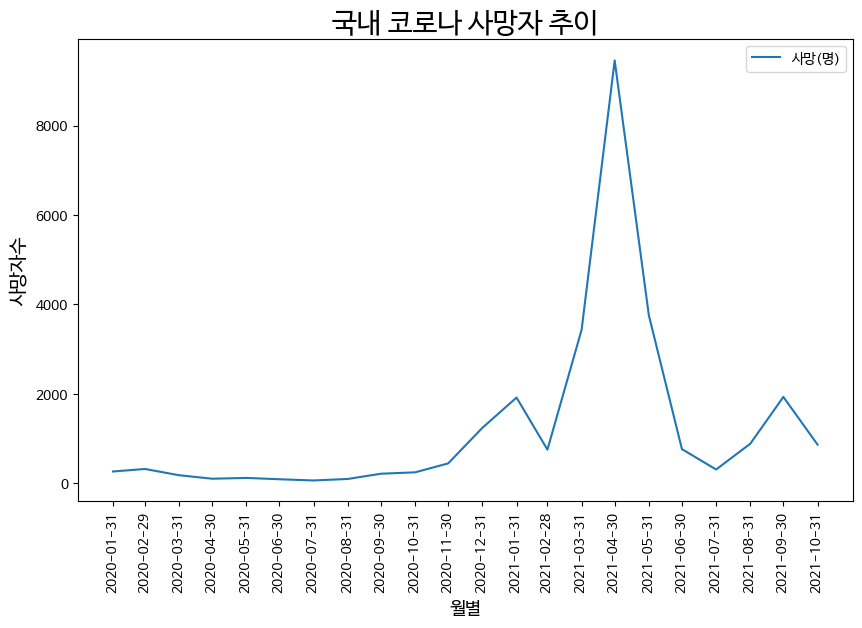

In [ ]:
df_name = monthly_covid.columns #weekly_covid(주 간격 피벗테이블)을 df_name에 저장

plt.figure(figsize = (10, 6)) #그래프 크기(가로 길이, 세로 길이)
for df in df_name:# df값 = 서울시 확진자, 전국 확진 - 각 컬럼에 해당하는 그래프를 for문을 돌면서 각각 그림
    plt.plot(monthly_covid[df], label = df) # 데이터 가져오기 - x축 : weekly_covid, y축 : label = df
    plt.legend() #범례표시
    plt.title('국내 코로나 사망자 추이', fontsize = 20) #그래프 제목
    plt.xlabel('월별', fontsize = 13) #x축 제목
    plt.ylabel('사망자수', fontsize = 14) #y축 제목
    plt.xticks(monthly_covid.index.to_list() , rotation=90) #x축 간격, rotationg = 글씨 90도로 돌리기